In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [2]:
import os
os.chdir("/content/drive/MyDrive//금융데이터 공모전")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv("BC card.csv", encoding='utf-8')

NameError: ignored

In [ ]:
df

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,광역시도,시군구,읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
306117,202103,20,여가/스포츠,2013,여행,여성,30대,1인가구,서울특별시,영등포구,영등포동7가,1411368,7
306118,202103,21,e상품/서비스,2110,o2o서비스,남성,30대,1인가구,서울특별시,영등포구,영등포동7가,1386040,63
306119,202103,11,패션잡화,1113,시계/주얼리,여성,30대,신혼영유아가구,서울특별시,영등포구,영등포동7가,390818,7
306120,202103,16,식품,1610,가공식품,남성,40대,초중고자녀가구,서울특별시,영등포구,영등포동7가,327592,7


In [ ]:
from matplotlib import font_manager, rc
font_path = "/content/drive/MyDrive/금융데이터 공모전/NanumGothic.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [ ]:
grouped = df['매출건수'].groupby([df['광역시도'],df['시군구'],df['읍면동'],df['품목중분류명']]).sum()

In [ ]:
grouped.unstack()

품목중분류명         DIY자재/용품  e머니/상품권   o2o서비스    가공식품  ...     침대  테이블가구    패션소품     향수
광역시도  시군구 읍면동                                      ...                             
서울특별시 강남구 개포동     210.0   4515.0  31984.0  3338.0  ...   41.0  122.0   964.0   32.0
          논현동     130.0   6782.0  62581.0  3798.0  ...   36.0  147.0   939.0  100.0
          대치동     216.0   7332.0  57979.0  4767.0  ...   24.0  218.0  1152.0  109.0
          도곡동     114.0   5015.0  39618.0  3256.0  ...   12.0  121.0   824.0   47.0
          삼성동     145.0   5087.0  42705.0  3631.0  ...   33.0  158.0   713.0   54.0
...                 ...      ...      ...     ...  ...    ...    ...     ...    ...
      중랑구 면목동     287.0  11343.0  83515.0  6704.0  ...  111.0  293.0  1721.0  242.0
          묵동      127.0   4743.0  34979.0  2904.0  ...   37.0   82.0   817.0   43.0
          상봉동      84.0   4245.0  32574.0  2398.0  ...   38.0  135.0   603.0   77.0
          신내동     151.0   4764.0  32410.0  3078.0  ...   32.0  133.0   779.0   58.0
          중화동      34.0   4291.0  29344.0  2218.0  ...    NaN   86.0   483.0   71.0

[428 rows x 50 columns]

In [ ]:
seoul= grouped.loc['서울특별시',:]

In [ ]:
# seoul.to_csv("seoul.csv")

In [ ]:
rseoul=pd.DataFrame(seoul['서울특별시'].rank(ascending=False).astype(int))

KeyError: ignored

In [ ]:
# rseoul.to_excel('rseoul.xlsx')

서울시 전체 카드 매출 건수 : 혼자사는 사람이 많은 지역일 수록 o2o서비스 (배달) 관련 건수가 많은 듯

In [ ]:
rseoul.sort_values(by='매출건수')

매출건수
시군구  읍면동    품목중분류명         
관악구  신림동    o2o서비스        1
     봉천동    o2o서비스        2
강서구  화곡동    o2o서비스        3
노원구  상계동    o2o서비스        4
양천구  신정동    o2o서비스        5
...                     ...
용산구  서빙고동   메이크업      12821
성북구  정릉동    기부/후원     12821
영등포구 양평동1가  뷰티소품      12821
중구   남대문로5가 메이크업      12821
     흥인동    임산부용품서비스  12821

[12964 rows x 1 columns]

In [ ]:
grouped2 = df['매출금액'].groupby([df['광역시도'],df['시군구'],df['읍면동'],df['품목중분류명']]).sum()

## 여기를 이용해서 지역 조절#######
seoul2 = grouped2.loc['서울특별시', '강남구','개포동',:]

seoul2

품목중분류명
DIY자재/용품      45066558
e머니/상품권      180015286
o2o서비스      1456821929
가공식품         127662558
가방            31341950
가전           125640206
건강식품         222931513
기부/후원           339707
기타            13664483
기타결제          54414215
기타교육비          7484494
남성뷰티            354305
남성속옷실내복        8028853
남성의류          49134725
다이어트           7025685
디지털          271431878
레저            31649201
메이크업          20984940
모바일상품         19752385
문화            61799216
미성년자이용불가        847562
바디케어          40327406
반려동물          15906764
베이비용품서비스      27909111
뷰티소품           3480682
생활용품         175333385
소파/의자          5446509
수납가구          18268231
스킨케어          61332301
스포츠           48836410
스포츠의류         77646943
시계/주얼리        21637771
신발            65603128
신선/요리재료      262681717
양말            19130798
어린이용품서비스     107413024
여성속옷실내복       15605470
여성의류          85302966
여행           235924409
육아용품서비스       76069122
음료            87372465
인테리어소품        15841412
임산부용품서비스      45085055
자동차 

In [ ]:
S2=pd.DataFrame(seoul2.rank(ascending=False).astype(int))
S2.sort_values(by='매출금액')

,매출금액
품목중분류명,
o2o서비스,1
취미/특기,2
디지털,3
신선/요리재료,4
여행,5
건강식품,6
e머니/상품권,7
생활용품,8
가공식품,9


지역구>> 가구생애주기 별 >> 품목들의 매출금액

In [ ]:
grouped3 = df['매출금액'].groupby([df['광역시도'],df['시군구'],df['읍면동'],df['가구생애주기'], df['품목중분류명']]).sum()
Gangnam3 = grouped3.loc['서울특별시',:]
# Gangnam3 = grouped3.loc['서울특별시','강남구','개포동','1인가구',:]

In [ ]:
Gangnam3.to_csv("가구생애주기까지고려.csv")

In [ ]:
G3=pd.DataFrame(Gangnam3.rank(ascending=False, ).astype(int))
G3.sort_values(by='매출금액')

매출금액
시군구 읍면동   가구생애주기  품목중분류명       
관악구 신림동   신혼영유아가구 o2o서비스      1
강서구 화곡동   신혼영유아가구 o2o서비스      2
관악구 신림동   1인가구    o2o서비스      3
    봉천동   신혼영유아가구 o2o서비스      4
          1인가구    o2o서비스      5
...                         ...
성동구 응봉동   1인가구    기타교육비   44192
송파구 장지동   노인가구    기타결제    44194
성북구 삼선동4가 1인가구    기타교육비   44194
종로구 원남동   1인가구    기타교육비   44196
마포구 아현동   신혼영유아가구 기타교육비   44197

[44197 rows x 1 columns]

이제 성별로 나누어서 살펴보자

In [ ]:
grouped4 = df['매출금액'].groupby([df['광역시도'],df['시군구'],df['읍면동'],df['성별'], df['품목중분류명']]).sum()
G4 = grouped4.loc['서울특별시',:]

In [ ]:
G4.to_csv("성별고려.csv")
G4= pd.read_csv("성별고려.csv")

In [ ]:
G4.sort_values(by='매출금액')

,시군구,읍면동,성별,품목중분류명,매출금액
16744,영등포구,영등포동7가,여성,기타교육비,3000
587,강남구,수서동,여성,기타교육비,4180
7863,마포구,동교동,남성,신발,4200
20032,종로구,원남동,여성,기타교육비,4355
9174,서대문구,남가좌동,여성,기타교육비,4500
...,...,...,...,...,...
15026,양천구,신정동,여성,o2o서비스,2859898881
5267,노원구,상계동,여성,o2o서비스,3038961482
3068,강서구,화곡동,여성,o2o서비스,3787740006
3248,관악구,봉천동,여성,o2o서비스,4076660088


In [ ]:
grouped5 = df['매출금액'].groupby([df['광역시도'],df['시군구'],df['읍면동'],df['연령'], df['품목중분류명']]).sum()
G5 = grouped5.loc['서울특별시',:]

In [ ]:
G5.to_csv("나이고려.csv")

In [ ]:
G5= pd.read_csv("나이고려.csv")
G5.sort_values(by='매출금액')

,시군구,읍면동,연령,품목중분류명,매출금액
19051,마포구,아현동,30대,기타교육비,4000
42078,종로구,원남동,20대,기타교육비,4355
27560,성북구,삼선동4가,20대,기타교육비,4500
31715,송파구,장지동,60대 이상,기타결제,4500
37779,용산구,청파동3가,20대,기타결제,4878
...,...,...,...,...,...
1869,강남구,역삼동,30대,o2o서비스,1682717348
7568,관악구,신림동,20대,o2o서비스,1985465857
6949,강서구,화곡동,30대,o2o서비스,2268946934
7376,관악구,봉천동,30대,o2o서비스,2572146717


그래프 시각화

In [ ]:
import seaborn as sns

In [ ]:
sum_sales= df['매출금액'].groupby(df['가구생애주기']).sum()
sum_csales= df['매출건수'].groupby(df['가구생애주기']).sum()

average_sales= sum_sales/sum_csales
average_sales=pd.DataFrame(average_sales)

average_sales.to_csv("average_sales.csv")
average_sales=pd.read_csv("average_sales.csv")

In [ ]:
average_sales=average_sales.rename(columns={'0':'1회당 평균결제금액'})

In [ ]:
average_sales.columns

Index(['가구생애주기', '1회당 평균결제금액'], dtype='object')

In [ ]:
average_sales["1회당 평균결제금액"].to_csv("건당결제금액(가구별).csv")

In [ ]:
x= list(average_sales['가구생애주기'])
y1= list(average_sales["1회당 평균결제금액"])
print(x,y1)

['1인가구', '노인가구', '성인자녀가구', '신혼영유아가구', '초중고자녀가구'] [35995.53282333812, 56403.90725950329, 53809.16612287379, 44873.117284597014, 50984.99896795217]


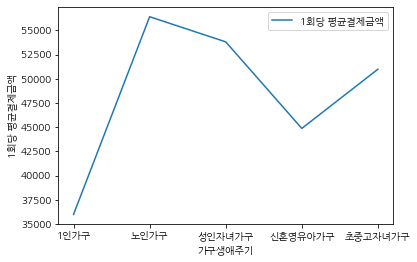

In [ ]:
sns.lineplot(x='가구생애주기', y='1회당 평균결제금액', data=average_sales, label='1회당 평균결제금액')

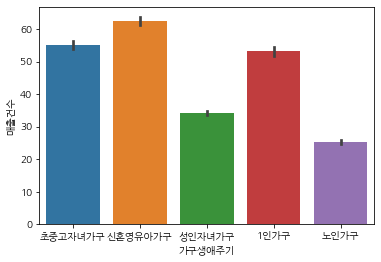

In [ ]:
sns.barplot(x='가구생애주기', y='매출건수', data=df, label='매출건수')

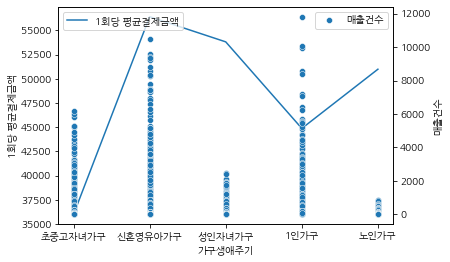

In [ ]:
fig, ax1 = plt.subplots()

ax1=sns.lineplot(x='가구생애주기', y='1회당 평균결제금액', data=average_sales, label='1회당 평균결제금액',legend=False)
# ax1.set_ylabel(r'1회당 평균결제금액 ($\times10^3$)')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2=sns.scatterplot(x='가구생애주기', y='매출건수', data=df, label='매출건수',zorder=1, legend=False, palette= 'Dark')

ax2.legend(loc='upper right')



In [ ]:
##법정동 별 건당 결제 금액

In [ ]:
sum_sales= df['매출금액'].groupby(df['읍면동']).sum()
sum_csales= df['매출건수'].groupby(df['읍면동']).sum()

average_sales2= sum_sales/sum_csales
average_sales2=pd.DataFrame(average_sales2)

average_sales2.to_csv("average_sales2.csv")
average_sales2=pd.read_csv("average_sales2.csv")

average_sales2=average_sales2.rename(columns={'0':'건당결제금액'})
average_sales2["건당결제금액"].to_csv("건당결제금액(읍면동).csv")

x= list(average_sales2['읍면동'])
y1= list(average_sales2["건당결제금액"])



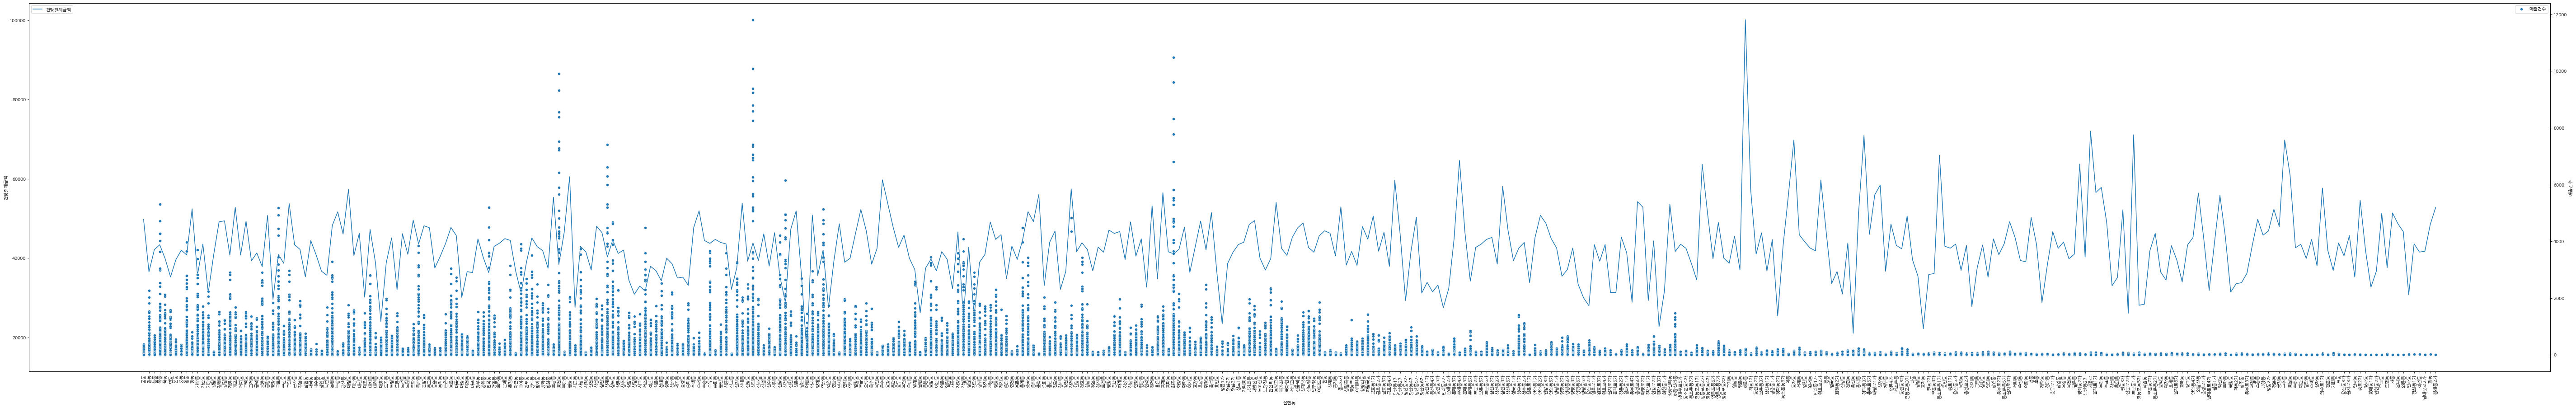

In [ ]:
fig, ax1 = plt.subplots(figsize=(100,15))

ax1=sns.lineplot(x='읍면동', y='건당결제금액', data=average_sales2, label='건당결제금액',legend=False)
ax1.legend(loc='upper left')
plt.xticks(rotation=90)

ax2 = ax1.twinx()
ax2=sns.scatterplot(x='읍면동', y='매출건수', data=df, label='매출건수',zorder=1, legend=False, palette= 'Dark')
# plt.yscale('log')

ax2.legend(loc='upper right')

# **연령별 건당 결제 금액**

In [ ]:
sum_sales= df['매출금액'].groupby(df['연령']).sum()
sum_csales= df['매출건수'].groupby(df['연령']).sum()

average_sales3= sum_sales/sum_csales
average_sales3=pd.DataFrame(average_sales3)

average_sales3.to_csv("average_sales3.csv")
average_sales3=pd.read_csv("average_sales3.csv")

average_sales3=average_sales3.rename(columns={'0':'건당결제금액'})
average_sales3["건당결제금액"].to_csv("건당결제금액(연령별).csv")

x= ['20세 미만','20대', '30대', '40대', '50대', '60대 이상']
y1= list(average_sales3["건당결제금액"])

In [ ]:
x

['20세 미만', '20대', '30대', '40대', '50대', '60대 이상']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

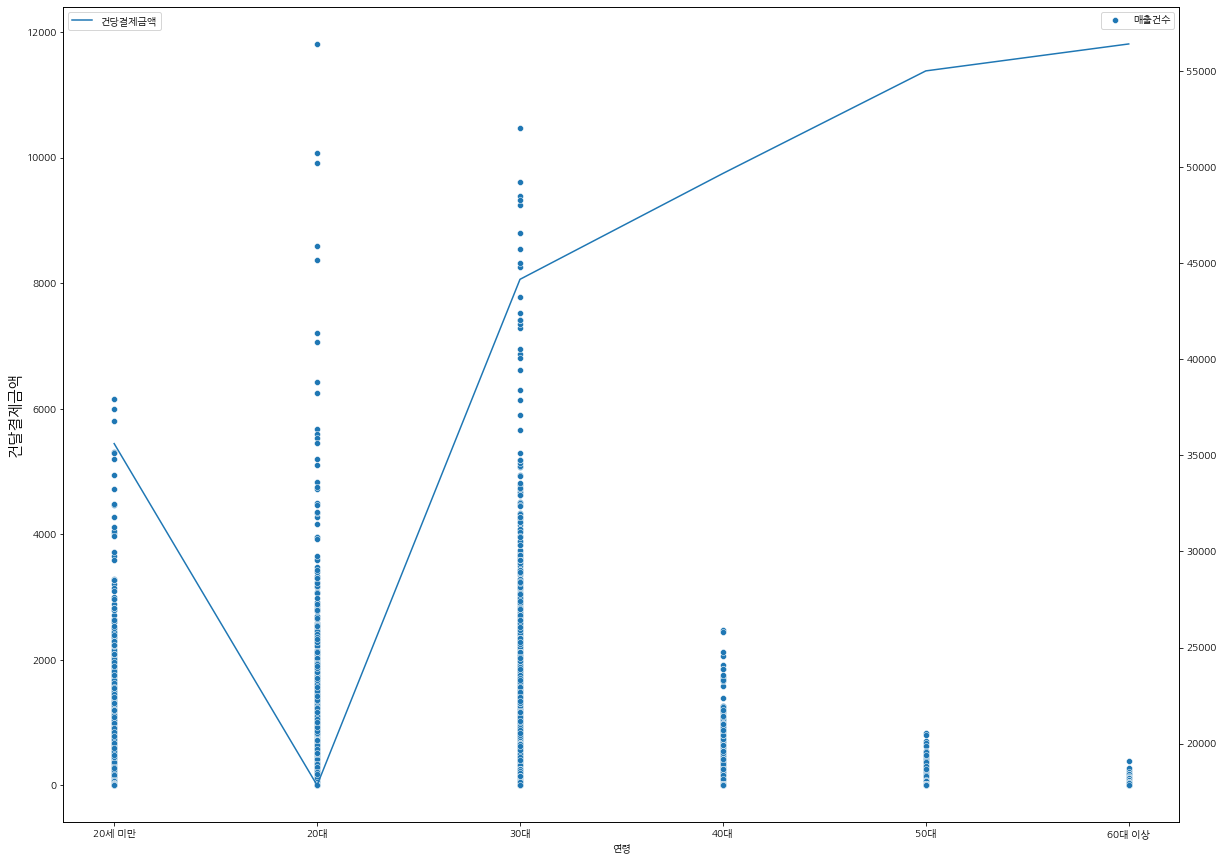

In [ ]:
fig, ax1 = plt.subplots(figsize=(20,15))


ax2=sns.scatterplot(x='연령', y='매출건수', data=df, label='매출건수',zorder=1, legend=False, palette= 'Dark')
plt.ylabel('건달결제금액', size=15)
ax2.legend(loc='upper right')

ax1 = ax2.twinx()
ax1=sns.lineplot(x, y1, data=average_sales3, label='건당결제금액',legend=False)
ax1.legend(loc='upper left')
plt.xlabel('연령', size=15)
plt.xticks(rotation=90)

In [ ]:
## 가구형태별 소비 품목의 변화

In [ ]:
# fig, ax1 = plt.subplots()
# x= df["가구생애주기"]
# y1= df['매출건수']
# ax1.bar(x, y1,linewidth=10, alpha=0.7, label='count')

# ax1.set_xlabel('Family')
# ax1.set_ylabel('Count of buying')
# ax1.tick_params(axis='both', direction='in')

#y2= average_sales.values
# ax2 = ax1.twinx()
# ax2.bar(x, y2, color='deeppink', label='Demand', alpha=0.7, width=0.7)
# ax2.set_ylim(0, 18)
# ax2.set_ylabel(r'Demand ($\times10^3$)')
# ax2.tick_params(axis='y', direction='in')

# plt.show()

In [ ]:
# sns.barplot( data=df, kind="line",
#     x="시군구", y="매출금액", col="가구생애주기",
#     hue="가구생애주기", style="가구생애주기")